<a href="https://colab.research.google.com/github/cychen116/DataAnalysis_practice/blob/main/10_ML_LogisticRegression_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Create Logistic Regression Function

In [1]:
from numpy import log, dot, e
from numpy.random import rand, randint
import matplotlib.pyplot as plt
import pandas as pd
epsilon = 0.00000000000000000000000000001

In [13]:
def sigmoid(z): return (1 / (1 + e**(-z)))

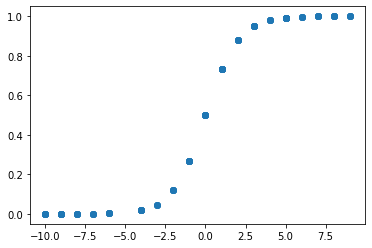

In [3]:
test_x = [randint(-10,10) for _ in range(100)]
test_y = [sigmoid(x) for x in test_x]
plt.scatter(test_x, test_y)

# Loading Data

In [4]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [5]:
data_dir = "/content/drive/MyDrive/Colab Notebooks/EMSE 6575/Data"
!ls "/content/drive/MyDrive/Colab Notebooks/EMSE 6575/Data"

 archive.zip
'breast cancer.csv'
 breast_cancer_data.csv
'Breast Cancer Dignostics_google.ipynb'
'Breast Cancer Dignostics.ipynb'
 diamonds.csv
 gender_submission.csv
'Group Project 1 Text for Analysis -- full version(1).txt'
 HR_comma_sep.csv
 iris.csv
 spam.csv
 spam_resaved.xlsx
 spam.xlsx
 test.csv
 train.csv
 train-images-idx3-ubyte.gz
 train-labels-idx1-ubyte.gz


In [10]:
data = pd.read_csv(data_dir + '/breast_cancer_data.csv')
data.drop(columns = 'Unnamed: 32', axis = 1, inplace = True)
print("data shape: " , data.shape)
data.head()

data shape:  (569, 32)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Categorized Diafnosis Results

In [11]:
data['dx'] = data['diagnosis'].astype('category').cat.codes

In [12]:
dd = data[['dx','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean']]
X = dd[['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean']]
y = dd['dx']

In [14]:
#### STARTING CONDITION -->> RANDOM
weights = rand(X.shape[1])
#### BLACK BOX 
def predict(X):
  z=sigmoid(dot(X,weights))
  return([1 if i > 0.5 else 0 for i in z])

### COST FUNCTION ---> this is how good our whole algorithm is
def cost_function(X,y,weights):
  y_hat = sigmoid(dot(X,weights))
  pred_1 = y*log(y_hat+epsilon)
  pred_0 = (1-y)*log(1-y_hat+epsilon)
  mean = - sum(pred_1 + pred_0)/len(X)
  return(mean)

In [15]:
y_h=cost_function(X,y,weights)

In [16]:
def random_walk(X,y):
  best_weights = []
  best_cost = 1000000000
  cost = []

  for _ in range(25):
    weights = rand(X.shape[1])
    c = cost_function(X,y,weights) #<<<---- $$$$ cost
    if c < best_cost:
      best_cost=c
      best_weights=weights
    cost.append(c)

  return(cost,best_weights)

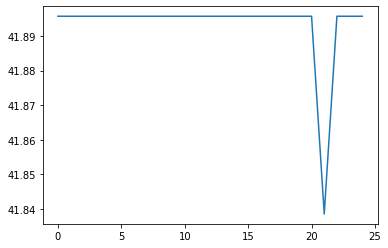

In [18]:
loss, weights = random_walk(X,y)
plt.plot(loss)

In [21]:
def fit(X,y,epochs=25,lr=0.01):
  loss = []
  weights = rand(X.shape[1])
  n = len(X)
  for _ in range(epochs):
    y_hat = sigmoid(dot(X,weights))
    delta = lr* dot(X.T, y_hat-y)/n
    weights -= delta
    loss.append(cost_function(X,y,weights))

    ### better stopping condition - derivative
    #if sum(delta)/len(delta) < 0.001:
    #  break

  return(loss,weights)

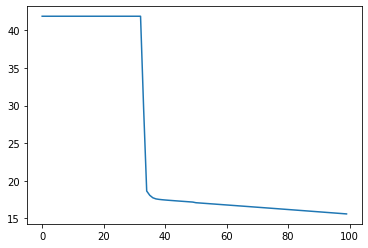

In [22]:
loss,weights = fit(X,y,epochs = 100, lr=0.0001)
plt.plot(loss)